In [1]:
#Import the modules
!pip install hvplot
!pip install kmodes
from kmodes.kmodes import KModes
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read file
df = pd.read_csv('/Users/andreashill/Desktop/GitHub/Project_4_Food_Delivery/Clusters/LabelEncoder copy.csv')

In [3]:
df.sample(10)

,Unnamed: 0,Category,Province,Latitude,Rating,Sentiment_score,Sentiment
3154,3157,30,4,43.476232,5.0,0.8220,1
541,541,14,4,43.223282,5.0,0.9862,1
4677,4891,82,5,46.362846,4.0,0.8934,1
3282,3285,68,4,43.414522,4.0,0.9291,1
1931,1932,53,1,49.287475,3.0,0.7269,1
4342,4349,25,5,45.401450,1.0,-0.3839,0
4604,4818,17,5,46.354695,5.0,0.6369,1
1414,1414,75,4,43.114634,5.0,0.9783,1
1211,1211,73,5,45.518770,5.0,0.9547,1
4248,4254,75,5,45.434493,1.0,0.1779,0


In [4]:
df['Category']

0       41
1       41
2       41
3       41
4       41
        ..
4800     2
4801     2
4802     2
4803     2
4804     2
Name: Category, Length: 4805, dtype: int64

In [5]:
selected_columns = ['Category', 'Rating',"Sentiment_score" ]
new_df = df[selected_columns]
new_df

,Category,Rating,Sentiment_score
0,41,5.0,0.9607
1,41,2.0,0.1966
2,41,3.0,0.8198
3,41,5.0,0.9287
4,41,5.0,0.5613
...,...,...,...
4800,2,5.0,0.7902
4801,2,5.0,0.0000
4802,2,5.0,0.5719
4803,2,5.0,0.5994


In [68]:
new_df.hvplot.scatter(
    x="Sentiment_score", 
    y="Category"
)

:Scatter   [Sentiment_score]   (Category)

In [7]:
data_standardized = new_df.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the 'Category', 'Rating', and 'Sentiment_score' columns
data_standardized[['Rating', 'Sentiment_score']] = scaler.fit_transform(data_standardized[[ 'Rating', 'Sentiment_score']])
data_standardized.sample(10)
#dummies
#PCA

,Category,Rating,Sentiment_score
387,36,0.758091,0.668466
1664,84,-1.195060,-2.647566
921,30,0.758091,0.693996
4405,68,-0.544010,-0.240343
3945,17,0.758091,0.632691
2896,68,0.758091,0.486809
2267,90,0.758091,0.558013
4375,74,0.758091,0.595526
3570,17,-1.195060,-2.570110
1723,49,0.758091,0.568607


In [8]:
category_dummies = pd.get_dummies(data_standardized['Category'], prefix='Category', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
data_with_dummies = pd.concat([data_standardized, category_dummies], axis=1)

# Drop the original 'Category' column if needed
data_with_dummies.drop('Category', axis=1, inplace=True)
data_with_dummies

,Rating,Sentiment_score,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,...,Category_86,Category_87,Category_88,Category_89,Category_90,Category_91,Category_92,Category_93,Category_94,Category_95
0,0.758091,0.663256,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.195060,-0.663747,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.544010,0.418557,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.758091,0.607682,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.758091,-0.030377,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,0.758091,0.367151,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4801,0.758091,-1.005180,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4802,0.758091,-0.011968,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4803,0.758091,0.035791,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
pca = PCA()
pca.fit(data_with_dummies)
print(pca.explained_variance_ratio_.round(2)[:10])

[0.59 0.09 0.04 0.03 0.02 0.02 0.02 0.01 0.01 0.01]


In [10]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

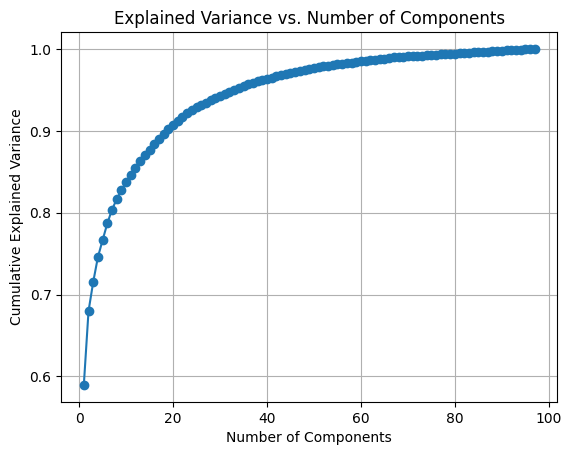

In [11]:
# Plot explained variance ratio
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [12]:
loadings = pca.components_

# Determine the absolute magnitude of the loadings
absolute_loadings = np.abs(loadings)

# Find the most important feature for each component
most_important_features = np.argmax(absolute_loadings, axis=1)

# Print the most important features for each component
for component, feature_idx in enumerate(most_important_features):
    feature_name = data_with_dummies.columns[feature_idx]  # Assuming you have column names
    print(f"Component {component+1}: Most important feature is {feature_name}")

Component 1: Most important feature is Rating
Component 2: Most important feature is Sentiment_score
Component 3: Most important feature is Category_2
Component 4: Most important feature is Category_68
Component 5: Most important feature is Category_53
Component 6: Most important feature is Category_14
Component 7: Most important feature is Category_14
Component 8: Most important feature is Category_30
Component 9: Most important feature is Category_41
Component 10: Most important feature is Category_25
Component 11: Most important feature is Category_63
Component 12: Most important feature is Category_9
Component 13: Most important feature is Category_3
Component 14: Most important feature is Category_3
Component 15: Most important feature is Category_82
Component 16: Most important feature is Category_75
Component 17: Most important feature is Category_90
Component 18: Most important feature is Category_54
Component 19: Most important feature is Category_62
Component 20: Most importa

In [13]:
pca = PCA(n_components=10)

# Fit the PCA model to the scaled data
X_pca = pca.fit_transform(data_with_dummies)
X_pca

array([[-0.99458897,  0.05871335, -0.02011558, ..., -0.51335371,
         0.77643108,  0.08918698],
       [ 1.3230794 , -0.38312174, -0.07047515, ..., -0.49708026,
         0.75021221,  0.08505375],
       [ 0.09835455, -0.68821348, -0.04901471, ..., -0.49690379,
         0.76539491,  0.08575997],
       ...,
       [-0.5032171 ,  0.53613833,  0.80852559, ..., -0.00380228,
         0.0298765 ,  0.01000192],
       [-0.53696103,  0.50237937,  0.80887439, ..., -0.0033843 ,
         0.03035733,  0.00995181],
       [-0.53696103,  0.50237937,  0.80887439, ..., -0.0033843 ,
         0.03035733,  0.00995181]])

In [14]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_.sum()

0.8371739436031546

In [28]:
# Create the PCA DataFrame
review_pca = pd.DataFrame(
    X_pca,
    columns=["PCA1", "PCA2", "PCA3", "PCA4","PCA5", "PCA6", "PCA7", "PCA8","PCA9", "PCA10"]
)

# Review the PCA DataFrame
review_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.994589,0.058713,-0.020116,-0.134990,0.005365,0.027073,-0.292653,-0.513354,0.776431,0.089187
1,1.323079,-0.383122,-0.070475,-0.176032,0.028406,0.058490,-0.277665,-0.497080,0.750212,0.085054
2,0.098355,-0.688213,-0.049015,-0.155492,0.007220,0.046924,-0.281904,-0.496904,0.765395,0.085760
3,-0.955323,0.097997,-0.020521,-0.135586,0.006538,0.027168,-0.292719,-0.513840,0.775872,0.089245
4,-0.504504,0.549016,-0.025181,-0.142425,0.020004,0.028258,-0.293473,-0.519424,0.769448,0.089915


In [29]:
# Create a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(review_pca)
    inertia.append(k_model.inertia_)

/Users/andreashill/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreashill/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreashill/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreashill/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

In [30]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,11851.844862
1,2,4872.352128
2,3,3717.785097
3,4,3368.445896
4,5,3039.924809


In [31]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [32]:
# Define the model Kmeans model using the optimal value of k for the number of clusters.
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(review_pca)

# Make predictions
k_3 = model.predict(review_pca)

# Create a copy of the customers_pca_df DataFrame
review_pca_pred = review_pca.copy()

# Add a class column with the labels
review_pca_pred["customer_segments"] = k_3
review_pca_pred

/Users/andreashill/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,customer_segments
0,-0.994589,0.058713,-0.020116,-0.134990,0.005365,0.027073,-0.292653,-0.513354,0.776431,0.089187,0
1,1.323079,-0.383122,-0.070475,-0.176032,0.028406,0.058490,-0.277665,-0.497080,0.750212,0.085054,2
2,0.098355,-0.688213,-0.049015,-0.155492,0.007220,0.046924,-0.281904,-0.496904,0.765395,0.085760,2
3,-0.955323,0.097997,-0.020521,-0.135586,0.006538,0.027168,-0.292719,-0.513840,0.775872,0.089245,0
4,-0.504504,0.549016,-0.025181,-0.142425,0.020004,0.028258,-0.293473,-0.519424,0.769448,0.089915,0
...,...,...,...,...,...,...,...,...,...,...,...
4800,-0.771083,0.268154,0.811294,0.448722,-0.021639,-0.036975,0.063547,-0.000484,0.033693,0.009604,0
4801,0.198534,1.238202,0.801272,0.434011,0.007322,-0.034630,0.061925,-0.012495,0.019877,0.011044,0
4802,-0.503217,0.536138,0.808526,0.444658,-0.013638,-0.036327,0.063099,-0.003802,0.029877,0.010002,0
4803,-0.536961,0.502379,0.808874,0.445170,-0.014646,-0.036409,0.063155,-0.003384,0.030357,0.009952,0


In [74]:
# Plot the clusters
review_pca_pred.hvplot.scatter(
    x="PCA1",
    y="PCA3",
    by="customer_segments"
)

:NdOverlay   [customer_segments]
   :Scatter   [PCA1]   (PCA3)

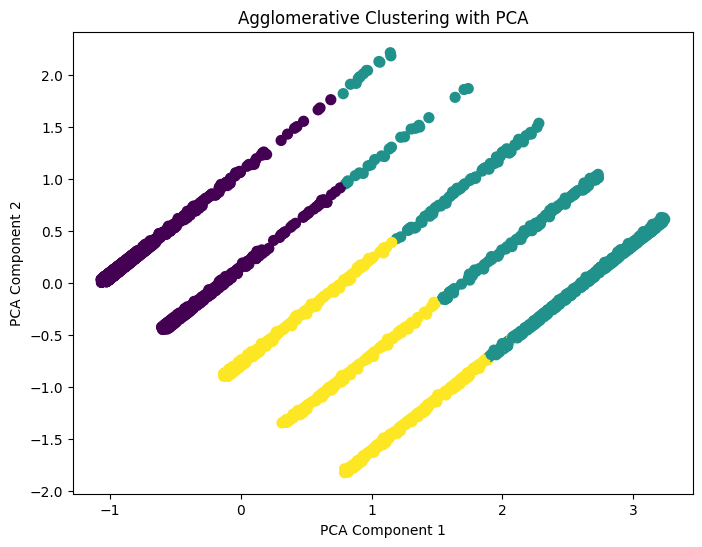

In [77]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(review_pca_pred)

# Step 6: Visualize the Clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(review_pca_pred["PCA1"], review_pca_pred["PCA2"], c=agg_clusters, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering with PCA')
plt.show()

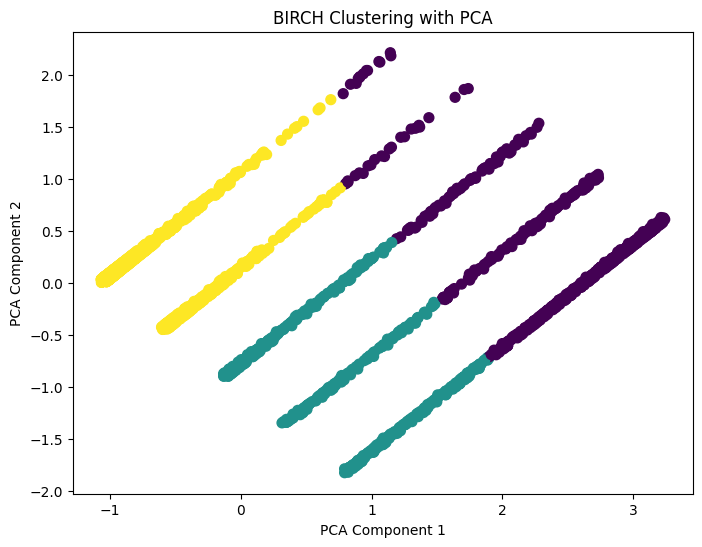

In [65]:
birch = Birch(n_clusters=3)
birch_clusters = birch.fit_predict(review_pca_pred)


plt.figure(figsize=(8, 6))
plt.scatter(review_pca_pred["PCA1"], review_pca_pred["PCA2"], c=birch_clusters, cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('BIRCH Clustering with PCA')
plt.show()